In [2]:
import os
import cv2
import numpy as np
folders = ["C:/Users/kalli/Documents/GitHub/Infant-Crying-Classification/Photos1/belly_pain",
           "C:/Users/kalli/Documents/GitHub/Infant-Crying-Classification/Photos1/burping",
           "C:/Users/kalli/Documents/GitHub/Infant-Crying-Classification/Photos1/discomfort",
           "C:/Users/kalli/Documents/GitHub/Infant-Crying-Classification/Photos1/hungry",
           "C:/Users/kalli/Documents/GitHub/Infant-Crying-Classification/Photos1/tired"]
        
          
          

# Initialize an empty list to store processed images
train_images = []

# Iterate through each folder
for folder in folders:
    # List all files in the folder
    files = os.listdir(folder)

    # Iterate through each file
    for file in files:
        # Get the full file path
        file_path = os.path.join(folder, file)

        # Read the image
        img = cv2.imread(file_path)

        # Process the image (e.g., resize, normalize, etc.)
        processed_img = cv2.resize(img, (400,200))  #
        processed_img = processed_img / 255.0  

        # Add processed image to the list
        train_images.append(processed_img)

# Convert the list of images to a numpy array
concatenated_images = np.array(train_images)

# Print the shape of concatenated images
print("Shape of concatenated images:", concatenated_images.shape)

Shape of concatenated images: (450, 200, 400, 3)


In [3]:
import tensorflow as tf
import numpy as np
num_classes = 5
labels = y = np.repeat([0,1,2,3,4],90)


y = tf.keras.utils.to_categorical(labels, num_classes)
print(y[90])

[0. 1. 0. 0. 0.]


In [4]:
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import pickle
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout,BatchNormalization,Activation
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(200,400, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

C:\Users\kalli\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.fit(concatenated_images,y,epochs =10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 93s 5s/step - accuracy: 0.3164 - loss: 2.2281
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.6240 - loss: 1.0391
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.7307 - loss: 0.7429
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.8531 - loss: 0.4227
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.8367 - loss: 0.4490
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.8807 - loss: 0.3664
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.8863 - loss: 0.3582
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.8749 - loss: 0.3718
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.9139 - loss: 0.3010
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.9127 - loss: 0.2789


Recording audio...


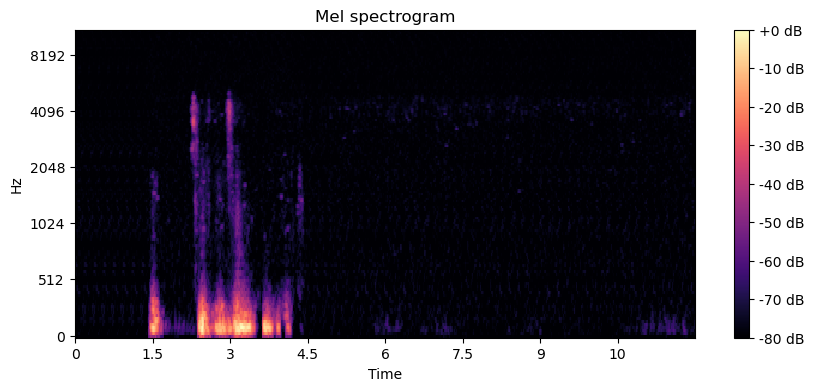

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 400), dtype=float32). Expected shape (None, 200, 400, 3), but input has incompatible shape (32, 400)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 400), dtype=float32)
  • training=False
  • mask=None

In [6]:
import pickle
import numpy as np
import librosa
import matplotlib.pyplot as plt
import sounddevice as sd

# Load the CNN model from the pickle file
# with open('cnn_model.pkl', 'rb') as f:
#     cnn_model = pickle.load(f)

# Function to record audio and return its spectrogram
def record_and_convert_to_spectrogram(duration=6, sr=44100):
    # Record audio
    print("Recording audio...")
    audio = sd.rec(int(duration * sr), samplerate=sr, channels=1, dtype='float32')
    sd.wait()  # Wait for recording to complete
    
    # Convert the audio into a spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio[:, 0], sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    
    return spectrogram_db

# Function to predict the reason for baby crying based on spectrogram
def predict_reason_for_crying(spectrogram,model):
    # Use the CNN model to predict
    processed_img = cv2.resize(spectrogram, (400,200))  
    processed_img = processed_img / 255.0
    prediction = model.predict(processed_img)
    return prediction

# Record audio and convert to spectrogram
spectrogram = record_and_convert_to_spectrogram()

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

# Predict the reason for baby crying
prediction = predict_reason_for_crying(spectrogram,model)
print("Predicted reason for baby crying:", prediction)

In [ ]:
pip install sounddevice


In [ ]:
pip install librosa

Recording audio...


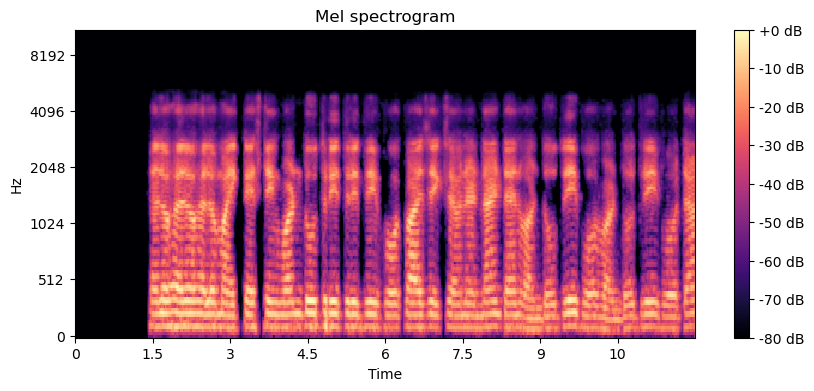

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted reason for baby crying: tired


In [10]:
# def load_and_convert_to_spectrogram(audio_path, sr=44100):
#     # Load audio file
#     audio, sr = librosa.load(audio_path, sr=sr)
    
#     # Convert the audio into a spectrogram
#     spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
#     spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
#     spectrogram_db = np.transpose(spectrogram_db)

#     return spectrogram_db

def record_and_convert_to_spectrogram(duration=6, sr=44100):
    # Record audio
    print("Recording audio...")
    audio = sd.rec(int(duration * sr), samplerate=sr, channels=1, dtype='float32')
    sd.wait()  # Wait for recording to complete
    
    # Convert the audio into a spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio[:, 0], sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    
    return spectrogram_db

def predict_reason_for_crying(spectrogram):
    # Resize the spectrogram to match the model's input shape
    processed_img = cv2.resize(spectrogram, (400, 200))  # Resize to desired output size
    # Add channel dimension
    processed_img = np.expand_dims(processed_img, axis=-1)
    # Stack the image 3 times to match the model's input shape
    processed_img = np.concatenate([processed_img] * 3, axis=-1)
    # Normalize the image
    processed_img = processed_img / 255.0
    prediction = model.predict(np.array([processed_img]))
    class_labels = ['belly_pain','burping','discomfort','hungry','tired']
    predicted_class = class_labels[np.argmax(prediction)]
    return predicted_class

# Load audio and convert to spectrogram
# audio_path = "C:\\Users\\kalli\\Documents\\GitHub\\Infant-Crying-Classification\\demo.wav"
spectrogram = record_and_convert_to_spectrogram()

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.show()

# Predict the reason for baby crying
predicted_class = predict_reason_for_crying(spectrogram)
print("Predicted reason for baby crying:", predicted_class)